In [65]:
# Step 1: Data Preprocessing

# 1.1 Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1.2 Load Dataset
df = pd.read_csv(r"Downloads\Passenger_Satisfaction.csv")

# 1.3 Check basic info
print(df.shape)
print(df.info())
print(df.describe())

# 1.4 Save target variable and Drop unwanted columns
label_enc = LabelEncoder()
y = df['satisfaction']
y = label_enc.fit_transform(y)

# Drop 'satisfaction', 'Unnamed: 0', and 'id'
df.drop(['Unnamed: 0', 'id', 'satisfaction'], axis=1, inplace=True)

# 1.5 Handle Missing Values
print("\nMissing values before handling:")
print(df.isnull().sum())

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

print("\nMissing values after handling:")
print(df.isnull().sum())

# 1.6 Remove Duplicates if any
print("\nDuplicate rows before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows after:", df.duplicated().sum())

# 1.7 One-Hot Encode Categorical Features
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# 1.8 Scale Numerical Features
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 1.9 Add encoded target variable back to DataFrame
df['Satisfaction'] = y  # Now the dataset includes the target

# 1.10 Final Check
print("\nProcessed DataFrame Shape:", df.shape)
print(df.head())

# 1.11 Save the cleaned dataset
df.to_csv(r"C:\Users\ratnakar\Downloads\customer_satisfaction\cleaned_passenger_satisfaction.csv", index=False)

(103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location             

Dataset Shape: (103904, 25)
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                 

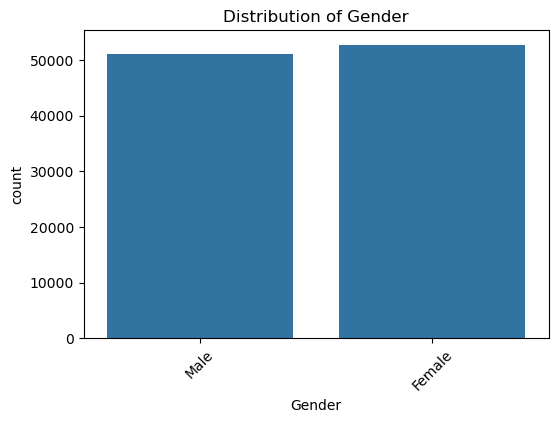

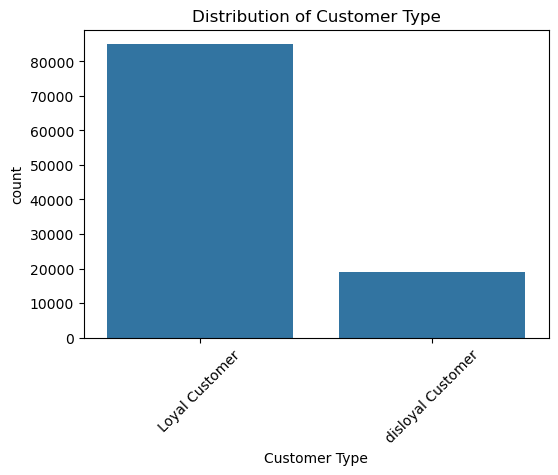

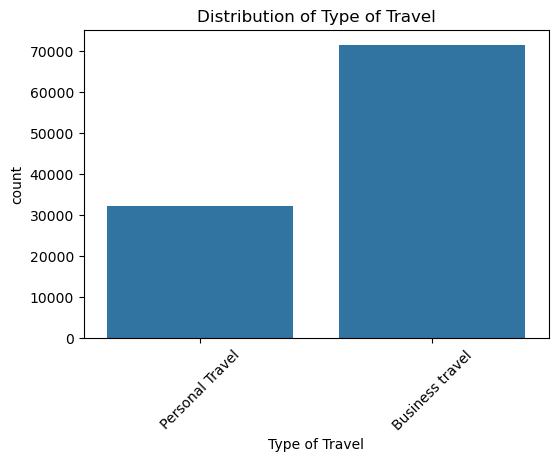

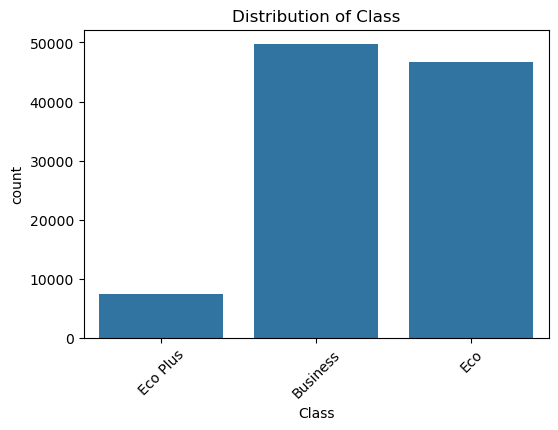

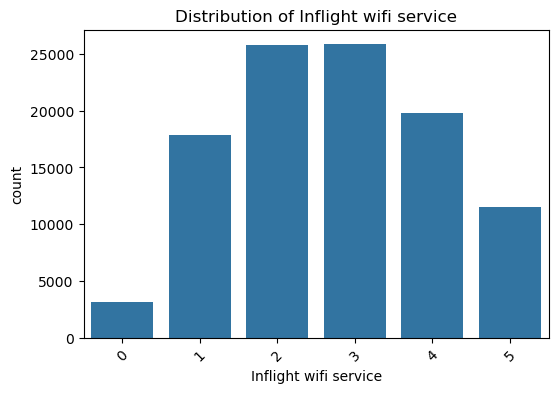

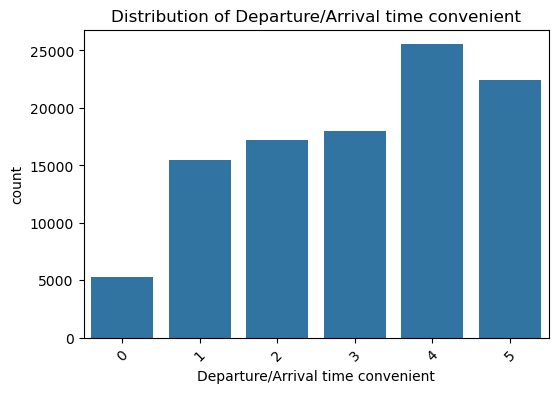

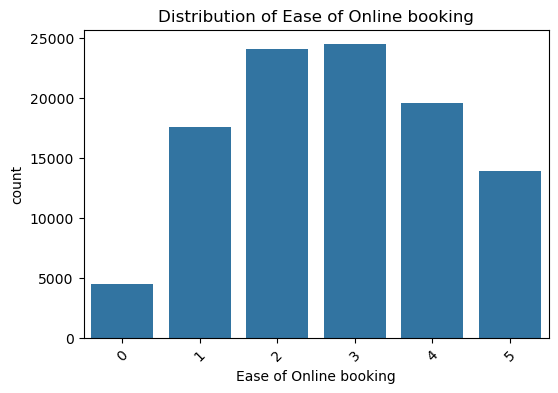

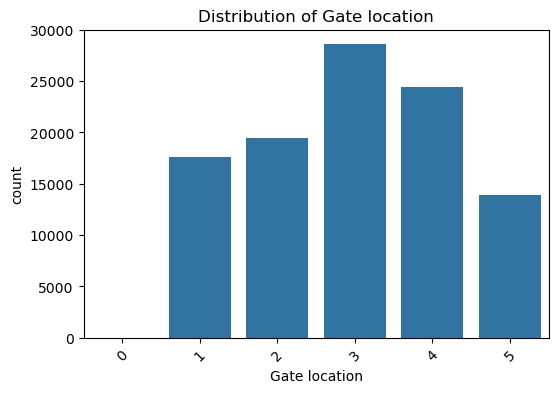

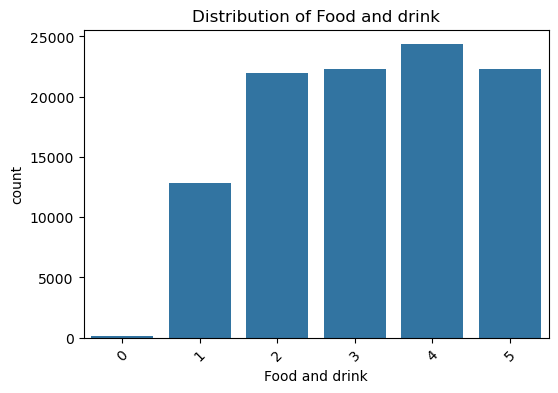

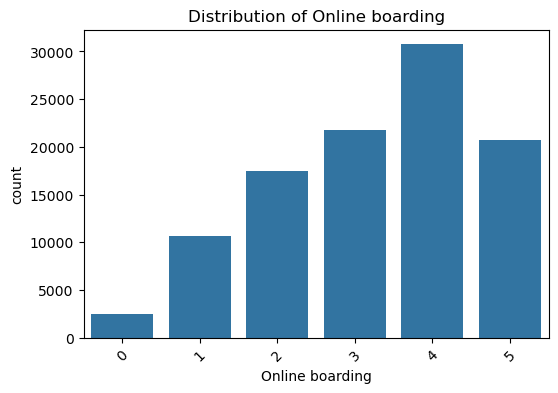

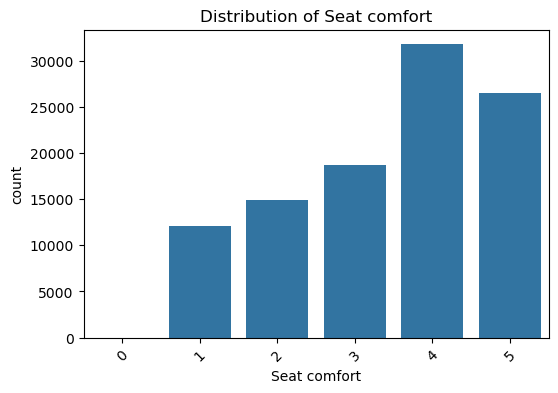

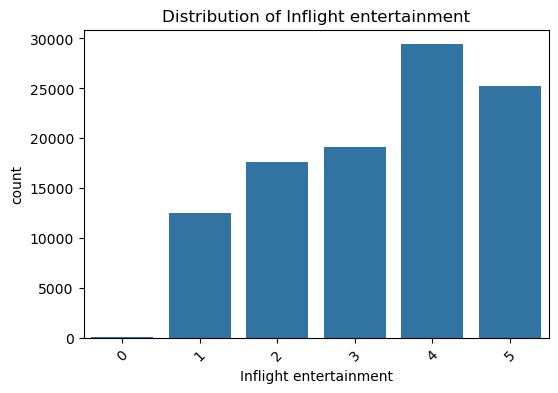

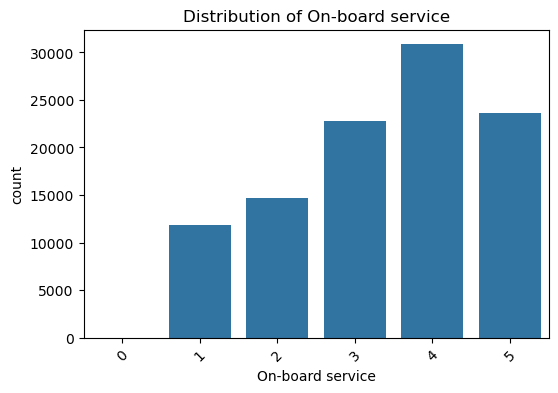

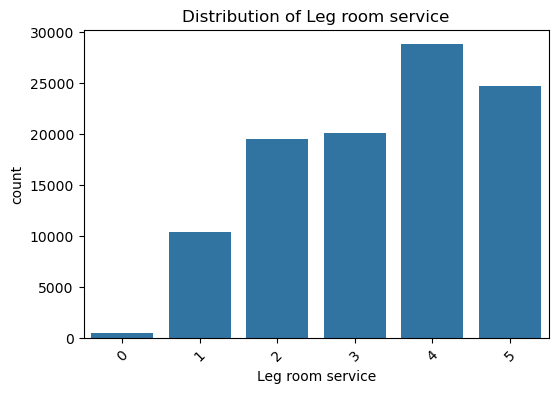

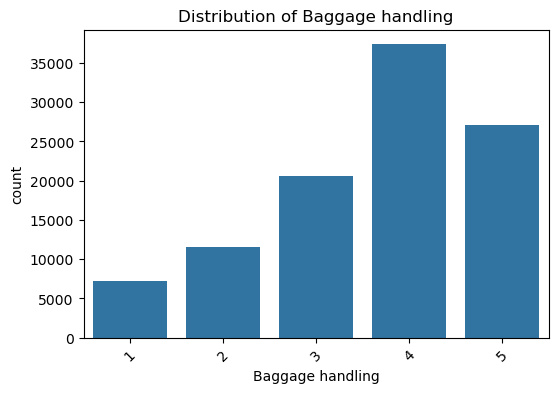

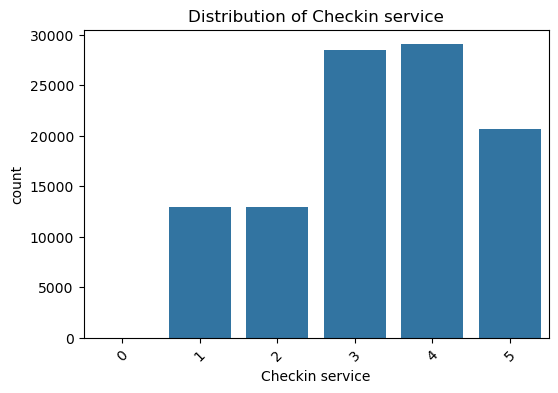

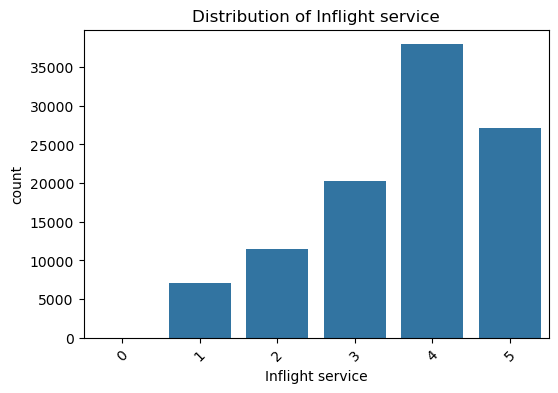

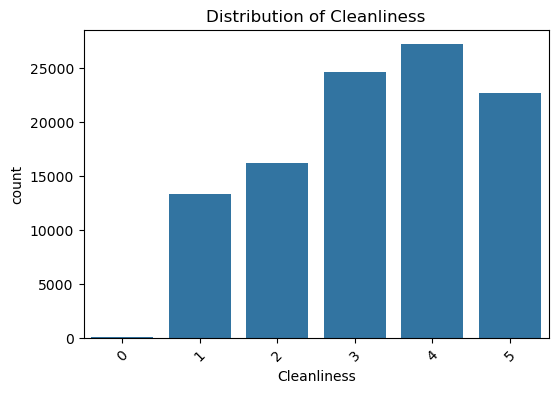

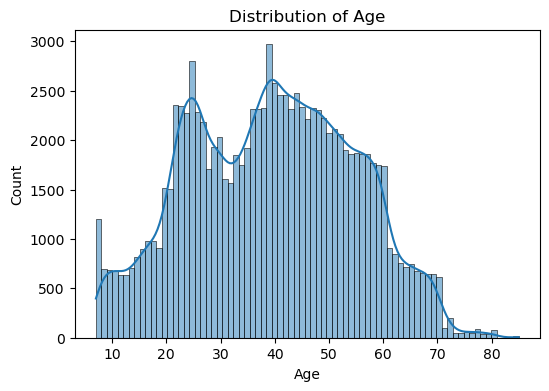

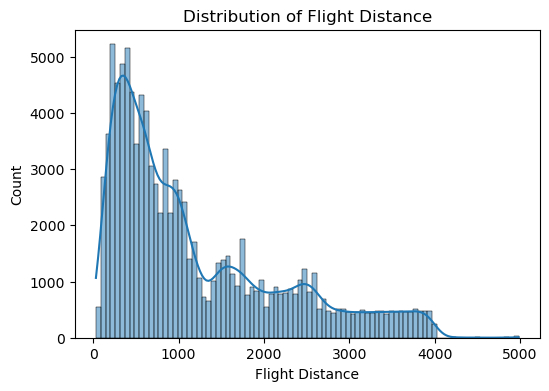

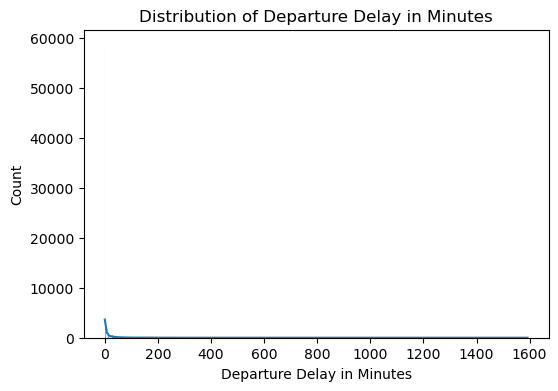

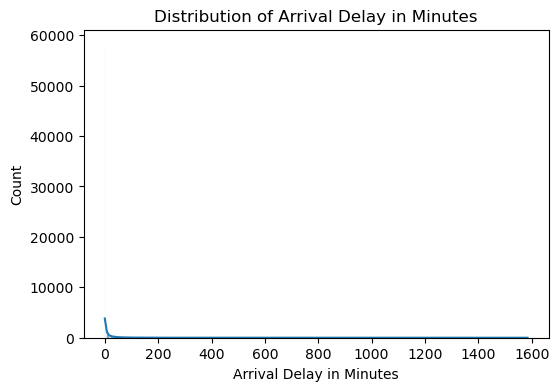

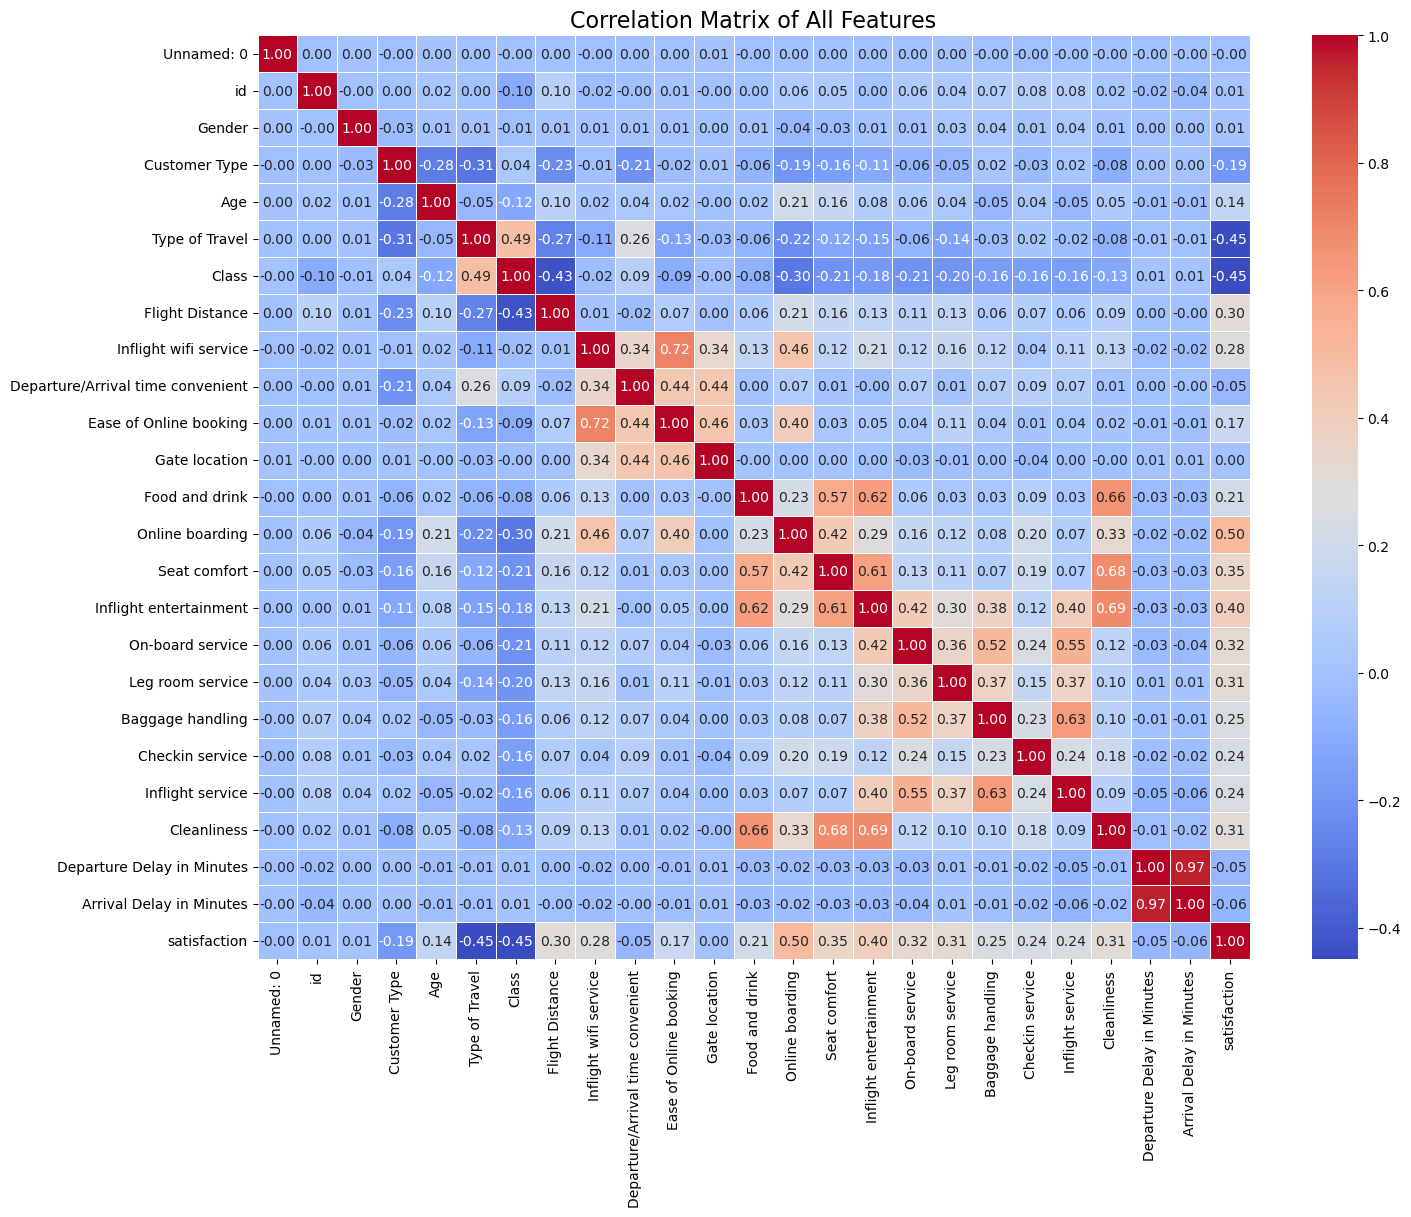

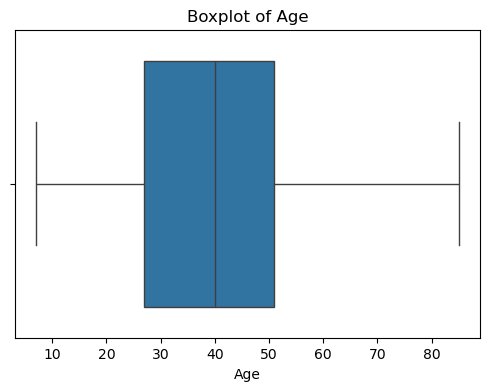

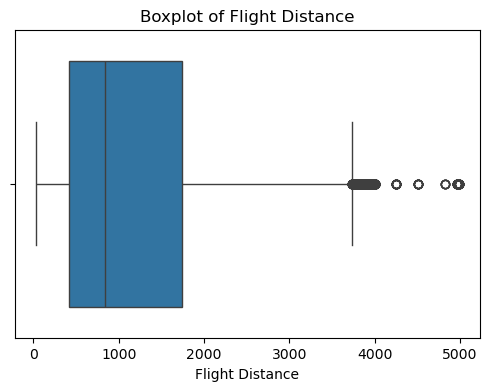

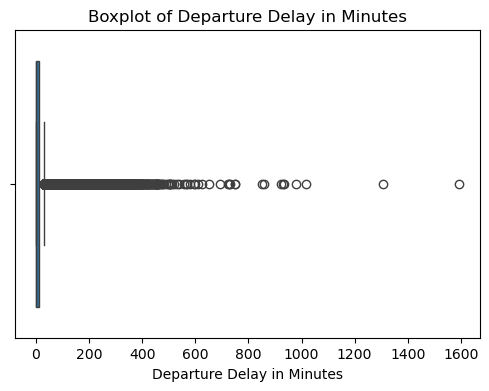

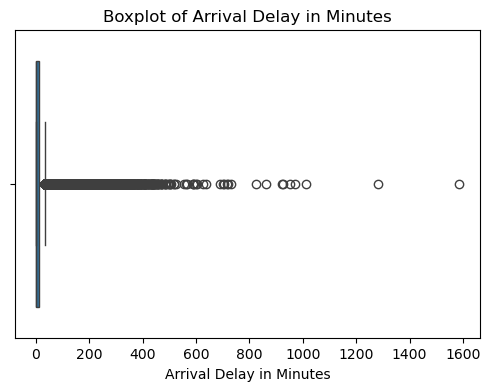

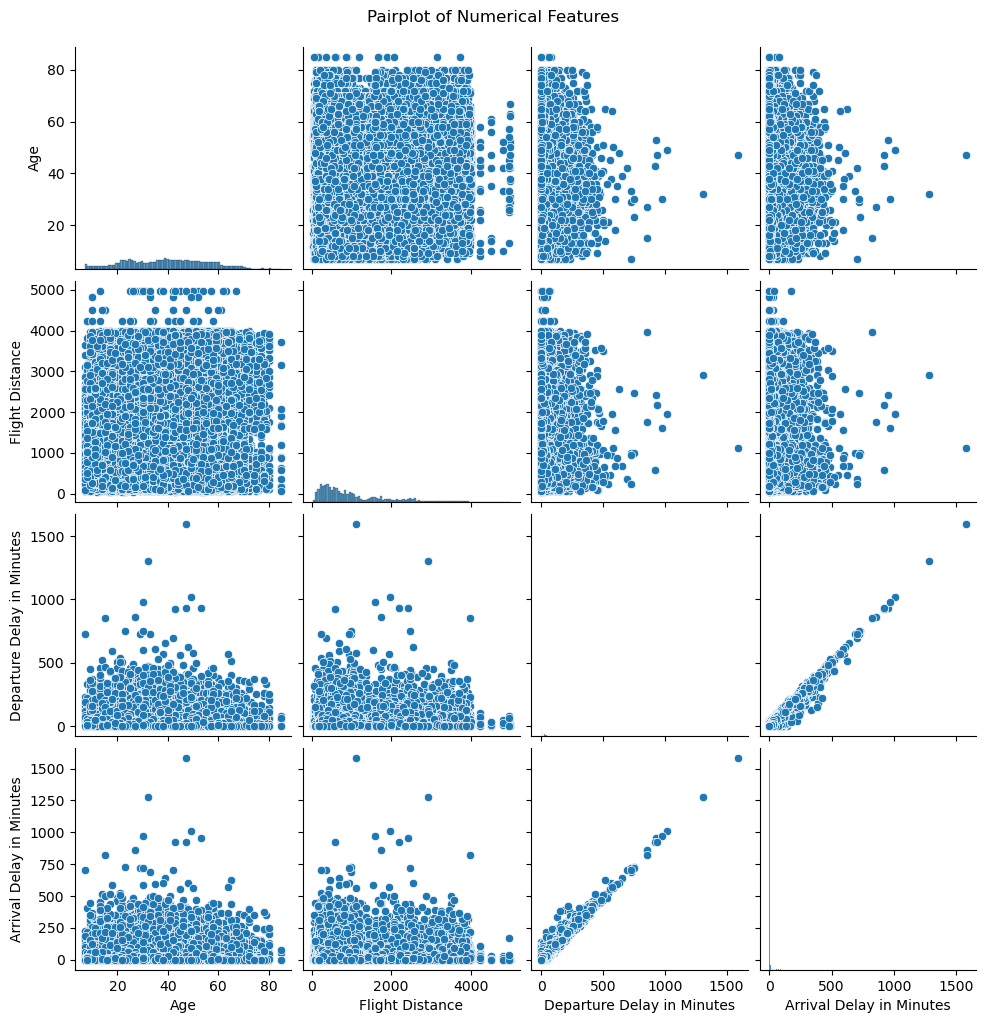

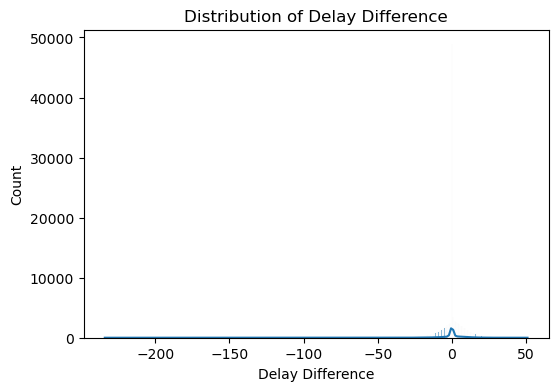

In [67]:
# 📦 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯 2. Load the dataset
df_eda = pd.read_csv(r"Downloads\Passenger_Satisfaction.csv")

# 🎯 3. Basic dataset information
print("Dataset Shape:", df_eda.shape)
print(df_eda.head())
print("\nBasic Info:")
print(df_eda.info())
print("\nSummary Statistics:")
print(df_eda.describe())

# 🎯 4. Check for missing values
print("\nMissing Values:")
print(df_eda.isnull().sum())

# 🎯 5. Check for duplicate rows
print("\nDuplicate Rows:")
print(df_eda.duplicated().sum())

# 🎯 6. Categorical Feature Distribution
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 
                'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
                'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
                'Inflight service', 'Cleanliness']

for col in cat_features:
    if col in df_eda.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df_eda, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

# 🎯 7. Numerical Feature Distribution
num_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for col in num_features:
    if col in df_eda.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df_eda[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# 🎯 8. Correlation Matrix (for ALL features)

# 8.1 Copy dataset
df_encoded = df_eda.copy()

# 8.2 Encode categorical columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# 8.3 Correlation matrix
correlation_matrix = df_encoded.corr()

# 8.4 Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.show()

# 🎯 9. Boxplots for Numerical Features (outlier detection)
for col in num_features:
    if col in df_eda.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df_eda[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# 🎯 10. Pairplot for Numerical Features
sns.pairplot(df_eda[num_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# 1.9: Feature Engineering (optional)
# You can create new features based on domain knowledge or insights from EDA
# For example, create a new feature 'Delay Difference' as the difference between departure and arrival delays
df_eda['Delay Difference'] = df_eda['Departure Delay in Minutes'] - df_eda['Arrival Delay in Minutes']
plt.figure(figsize=(6, 4))
sns.histplot(df_eda['Delay Difference'], kde=True)
plt.title('Distribution of Delay Difference')
plt.show()

# 1.10: Save processed data after EDA (optional for later use)
# After performing EDA, you can save the dataframe if any transformations are done
# df_eda.to_csv(r"C:\Users\ratnakar\Downloads\customer_satisfaction\processed_eda_data.csv", index=False)


Logistic Regression Accuracy: 0.8765
Random Forest Accuracy: 0.9617
Gradient Boosting Accuracy: 0.9408


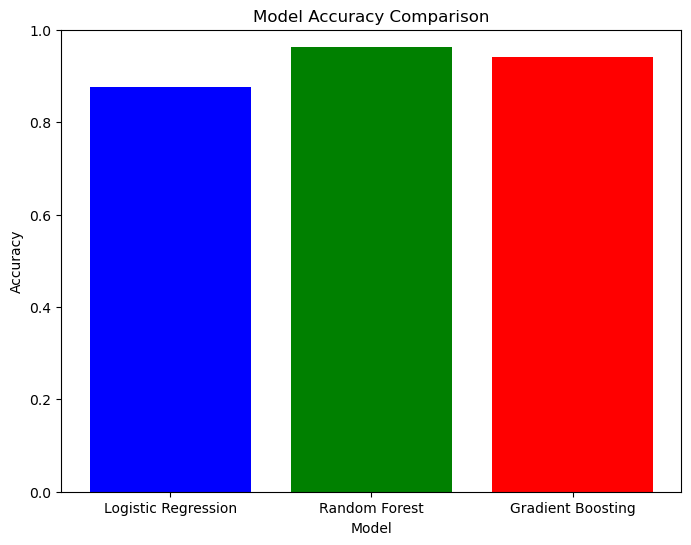

In [73]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import mlflow
import mlflow.sklearn

# Step 1: Load the cleaned dataset
df = pd.read_csv(r"C:\Users\ratnakar\Downloads\customer_satisfaction\cleaned_passenger_satisfaction.csv")

# Step 2: Separate features (X) and target variable (y)
X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize the models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Step 6: Start MLflow experiment
with mlflow.start_run():
    # Train models
    log_reg.fit(X_train_scaled, y_train)
    rf.fit(X_train_scaled, y_train)
    gb.fit(X_train_scaled, y_train)

    # Predict
    y_pred_log_reg = log_reg.predict(X_test_scaled)
    y_pred_rf = rf.predict(X_test_scaled)
    y_pred_gb = gb.predict(X_test_scaled)

    # Accuracy
    log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    gb_accuracy = accuracy_score(y_test, y_pred_gb)

    # Log metrics
    mlflow.log_metric("Logistic Regression Accuracy", log_reg_accuracy)
    mlflow.log_metric("Random Forest Accuracy", rf_accuracy)
    mlflow.log_metric("Gradient Boosting Accuracy", gb_accuracy)

    # Log models with input example to suppress warnings
    input_example = X_test_scaled[:5]
    mlflow.sklearn.log_model(log_reg, "Logistic_Regression_Model", input_example=input_example)
    mlflow.sklearn.log_model(rf, "Random_Forest_Model", input_example=input_example)
    mlflow.sklearn.log_model(gb, "Gradient_Boosting_Model", input_example=input_example)

    # Save and log the scaler
    joblib.dump(scaler, "scaler.pkl")
    mlflow.log_artifact("scaler.pkl")

    # Print results
    print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
    print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

# Step 7: Save models locally
joblib.dump(log_reg, r"C:\Users\ratnakar\Downloads\customer_satisfaction\logistic_regression_model.pkl")
joblib.dump(rf, r"C:\Users\ratnakar\Downloads\customer_satisfaction\random_forest_model.pkl")
joblib.dump(gb, r"C:\Users\ratnakar\Downloads\customer_satisfaction\gradient_boosting_model.pkl")

# Step 8: Visualize the accuracy comparison
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [log_reg_accuracy, rf_accuracy, gb_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

In [75]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the pre-trained models
logreg_model = joblib.load(r"C:\Users\ratnakar\Downloads\customer_satisfaction\logistic_regression_model.pkl")
rf_model = joblib.load(r"C:\Users\ratnakar\Downloads\customer_satisfaction\random_forest_model.pkl")
gb_model = joblib.load(r"C:\Users\ratnakar\Downloads\customer_satisfaction\gradient_boosting_model.pkl")

# Feature names as they were during training
features = [
    "Gender", "Customer Type", "Age", "Type of Travel", "Class", "Flight Distance", 
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort", 
    "Inflight entertainment", "On-board service", "Leg room service", 
    "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", 
    "Departure Delay in Minutes", "Arrival Delay in Minutes", "satisfaction"
]

# Create a function for predicting customer satisfaction
def predict_satisfaction(model, data):
    prediction = model.predict(data)
    return prediction

# Streamlit app
st.title("Customer Satisfaction Prediction")

st.write(
    "Enter the values for the features and click on 'Predict' to get the customer satisfaction prediction."
)

# Input fields for all the features
gender = st.selectbox("Gender", ["Male", "Female"])
customer_type = st.selectbox("Customer Type", ["Loyal Customer", "Disloyal Customer"])
age = st.number_input("Age", min_value=18, max_value=100, value=30)
type_of_travel = st.selectbox("Type of Travel", ["Business travel", "Personal Travel"])
class_type = st.selectbox("Class", ["Economy", "Business", "First"])
flight_distance = st.number_input("Flight Distance", min_value=0)
wifi_service = st.selectbox("Inflight wifi service", [1, 2, 3, 4, 5])  # Rating scale
departure_time = st.selectbox("Departure/Arrival time convenient", [1, 2, 3, 4, 5])  # Rating scale
online_booking = st.selectbox("Ease of Online booking", [1, 2, 3, 4, 5])  # Rating scale
gate_location = st.selectbox("Gate location", [1, 2, 3, 4, 5])  # Rating scale
food_drink = st.selectbox("Food and drink", [1, 2, 3, 4, 5])  # Rating scale
online_boarding = st.selectbox("Online boarding", [1, 2, 3, 4, 5])  # Rating scale
seat_comfort = st.selectbox("Seat comfort", [1, 2, 3, 4, 5])  # Rating scale
entertainment = st.selectbox("Inflight entertainment", [1, 2, 3, 4, 5])  # Rating scale
onboard_service = st.selectbox("On-board service", [1, 2, 3, 4, 5])  # Rating scale
leg_room = st.selectbox("Leg room service", [1, 2, 3, 4, 5])  # Rating scale
baggage_handling = st.selectbox("Baggage handling", [1, 2, 3, 4, 5])  # Rating scale
checkin_service = st.selectbox("Checkin service", [1, 2, 3, 4, 5])  # Rating scale
inflight_service = st.selectbox("Inflight service", [1, 2, 3, 4, 5])  # Rating scale
cleanliness = st.selectbox("Cleanliness", [1, 2, 3, 4, 5])  # Rating scale
departure_delay = st.number_input("Departure Delay in Minutes", min_value=0)
arrival_delay = st.number_input("Arrival Delay in Minutes", min_value=0)

# Collect all the input data into a DataFrame
input_data = pd.DataFrame(
    [[
        gender, customer_type, age, type_of_travel, class_type, flight_distance, 
        wifi_service, departure_time, online_booking, gate_location, food_drink, 
        online_boarding, seat_comfort, entertainment, onboard_service, leg_room, 
        baggage_handling, checkin_service, inflight_service, cleanliness, departure_delay, arrival_delay
    ]],
    columns=features
)

# Convert categorical columns into numerical values (e.g., Gender, Customer Type, etc.)
input_data['Gender'] = input_data['Gender'].map({"Male": 0, "Female": 1})
input_data['Customer Type'] = input_data['Customer Type'].map({"Loyal Customer": 0, "Disloyal Customer": 1})
input_data['Type of Travel'] = input_data['Type of Travel'].map({"Business travel": 0, "Personal Travel": 1})
input_data['Class'] = input_data['Class'].map({"Economy": 0, "Business": 1, "First": 2})

# Scale the input data (assuming the model was trained with scaled features)
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data)

# Predict customer satisfaction with the Logistic Regression model
if st.button("Predict"):
    prediction = predict_satisfaction(logreg_model, input_data_scaled)
    st.write(f"Customer satisfaction prediction: {prediction[0]}")

2025-04-29 17:32:52.935 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 17:32:53.263 
  command:

    streamlit run C:\Users\ratnakar\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-29 17:32:53.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 17:32:53.267 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 17:32:53.267 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 17:32:53.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 17:32:53.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-29 17:32:53.270 Thread 'MainThread':